In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
l = lambda : "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.datetime.now())

In [3]:
d = l()

In [4]:
print(d)

2021-08-03T18-22-38/


### softmax vs softmax-T

In [5]:
import torch
import torch.nn.functional as F

In [6]:
length = 5
a = torch.rand(1, length)
print(a.shape, a)

torch.Size([1, 5]) tensor([[0.0026, 0.5491, 0.4095, 0.0524, 0.1833]])


<IPython.core.display.Javascript object>


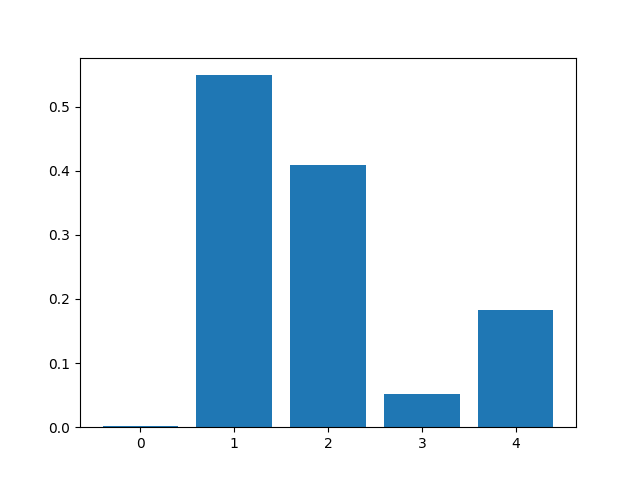

<BarContainer object of 5 artists>

In [7]:
x = np.linspace(0, length-1, length)
y = a.numpy()[0]
plt.bar(x, y)

In [8]:
s_a = F.softmax(a, dim=1)
print(s_a)
print(s_a.sum(dim=1))

tensor([[0.1544, 0.2666, 0.2319, 0.1622, 0.1849]])
tensor([1.0000])


<IPython.core.display.Javascript object>


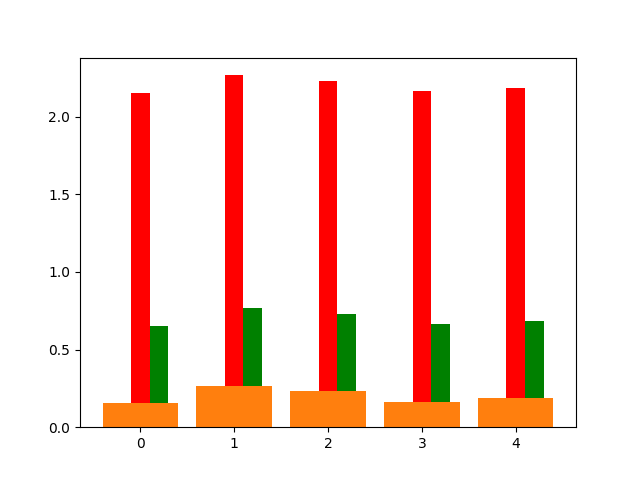

In [9]:
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, length-1, length)
y = s_a.numpy()[0]+2
ax.bar(x, y, color='red', width=width, label='s_a')
y = s_a.numpy()[0]+0.5
ax.bar(x+width, y, color='green', width=width, label='s_a-')
plt.show()

In [10]:
T = 1
st_a_1 = F.softmax(a/T, dim=1)
print(st_a_1)

tensor([[0.1544, 0.2666, 0.2319, 0.1622, 0.1849]])


In [11]:
y = st_a_1.numpy()[0]
plt.bar(x, y)

<BarContainer object of 5 artists>

In [12]:
T = 10
st_a_10 = F.softmax(a/T, dim=1)
print(st_a_10)

tensor([[0.1953, 0.2062, 0.2034, 0.1963, 0.1988]])


In [13]:
T = 0.5
st_a_05 = F.softmax(a/T, dim=1)
print(st_a_05)

tensor([[0.1139, 0.3398, 0.2570, 0.1258, 0.1635]])


In [14]:
plt.bar(x, st_a_1.numpy()[0])

<BarContainer object of 5 artists>

<IPython.core.display.Javascript object>


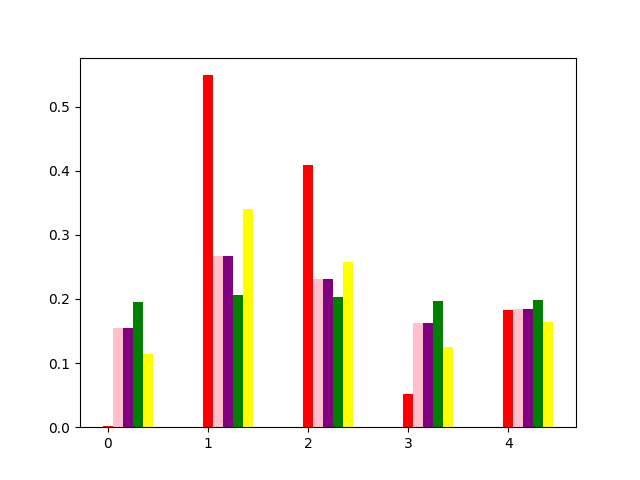

In [18]:
width = 0.1
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, length-1, length)
ax.bar(x, a.numpy()[0], color='red', width=width, label='s_a')
ax.bar(x+width*1, s_a.numpy()[0], color='pink', width=width, label='s_a')
ax.bar(x+width*2, st_a_1.numpy()[0], color='purple', width=width, label='s_a')
ax.bar(x+width*3, st_a_10.numpy()[0], color='green', width=width, label='s_a-')
ax.bar(x+width*4, st_a_05.numpy()[0], color='yellow', width=width, label='s_a-')
plt.show()

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
start, end = -5, 10
i = torch.FloatTensor(np.linspace(start, end, end - start + 1))
ei = i.exp()  # torch.exp(i)

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
         9., 10.])
tensor([6.7379e-03, 1.8316e-02, 4.9787e-02, 1.3534e-01, 3.6788e-01, 1.0000e+00,
        2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02, 4.0343e+02,
        1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04])


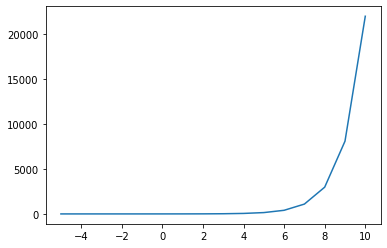

In [48]:
print(i)
print(ei)
plt.plot(i.numpy(), ei.numpy())

In [49]:
torch.exp(torch.FloatTensor([0, 1, 2, 3]))

tensor([ 1.0000,  2.7183,  7.3891, 20.0855])

<IPython.core.display.Javascript object>


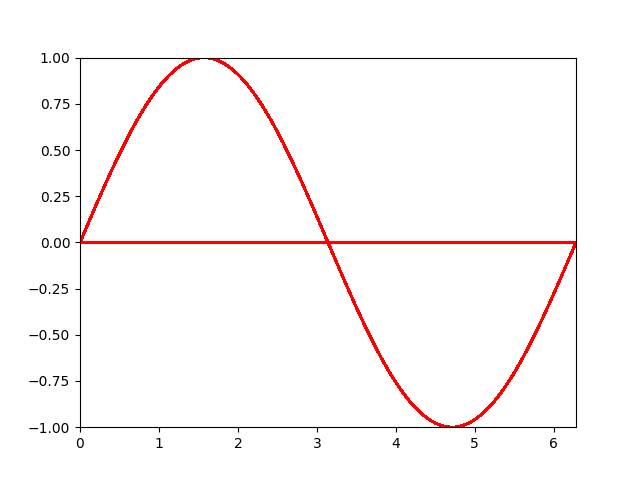

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()


<IPython.core.display.Javascript object>


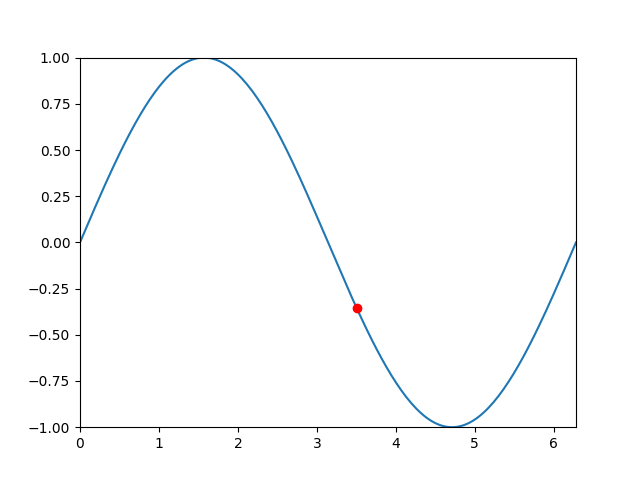

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation


fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)
l = ax.plot(x, y)
dot, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return l

def gen_dot():
    for i in np.linspace(0, 2*np.pi, 200):
        newdot = [i, np.sin(i)]
        yield newdot

def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot, interval = 100, init_func=init)
ani.save('sin_dot.gif', writer='imagemagick', fps=30)

plt.show()